# BT4222 Project Group 16

Chan Qian Hui | Gan Shi Yong, Thomas | Heng Jie Kai Joven | Ong Ian Jie Joshua | Shervin Lee Jia Ning

# Data Preparation 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Hotel_Reviews_with_tags.csv')
data.head()

,Unnamed: 0,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,...,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Trip_purpose,trip_companions,room_type
0,0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Leisure,Couple,Double
1,1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Leisure,Couple,Double
2,2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Leisure,Family,Double
3,3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,Leisure,Solo,Double
4,4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,...,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,Leisure,Couple,Suite


In [3]:
data.drop(columns = ['Unnamed: 0', 'Tags'], inplace = True)

In [4]:
data.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'days_since_review', 'lat', 'lng', 'Trip_purpose', 'trip_companions',
       'room_type'],
      dtype='object')

In [5]:
data.shape

(515738, 19)

In [6]:
data['Hotel_Name'].value_counts()

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
                                                     ... 
Le Lavoisier                                           12
Ibis Styles Milano Palmanova                           12
Mercure Paris Porte d Orleans                          10
Hotel Wagner                                           10
Hotel Gallitzinberg                                     8
Name: Hotel_Name, Length: 1492, dtype: int64

# Exploratory Data Analysis

<AxesSubplot:title={'center':'Hotel distribution in States'}>

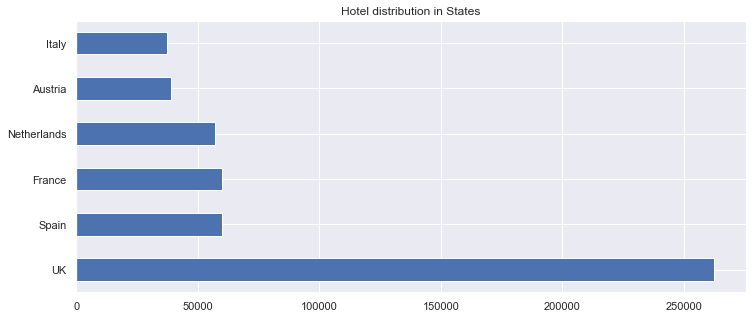

In [13]:
sns.set()
data.Hotel_Address = data.Hotel_Address.str.replace('United Kingdom','UK')
data['State'] = data.Hotel_Address.apply(lambda x: x.split(' ')[-1])
# Now we can check distribution in  and in state
plt.figure(figsize = (12,5))
plt.title('Hotel distribution in States')
data.State.value_counts().plot.barh()

In [4]:
count_neg = data.loc[data["Negative_Review"]!="No Negative"]
count_pos = data.loc[data["Positive_Review"]!="No Positive"]
print(len(count_neg), len(count_pos))

387848 479792


Distribution of the dataset

Text(0, 0.5, 'Count')

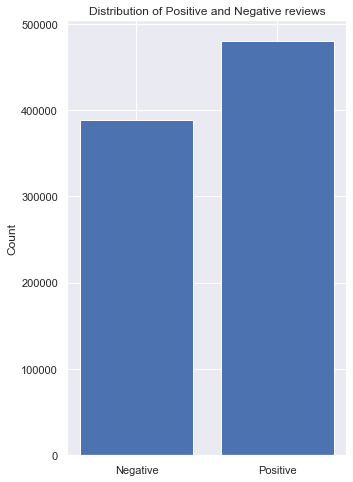

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

x = ["Negative", "Positive"]
y =[387848, 479792]

plt.figure(figsize=(5,8))
plt.bar(x,y)
plt.title("Distribution of Positive and Negative reviews")
plt.ylabel("Count")
# plt.xlabel("Categories")

In [6]:
df_temp = data[["Additional_Number_of_Scoring", "Average_Score", "Review_Total_Negative_Word_Counts", "Total_Number_of_Reviews", "Review_Total_Positive_Word_Counts","Total_Number_of_Reviews_Reviewer_Has_Given", "Reviewer_Score"]]
df_temp.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000


Correlation of attributes 

<AxesSubplot:title={'center':'Correlation of Attributes'}>

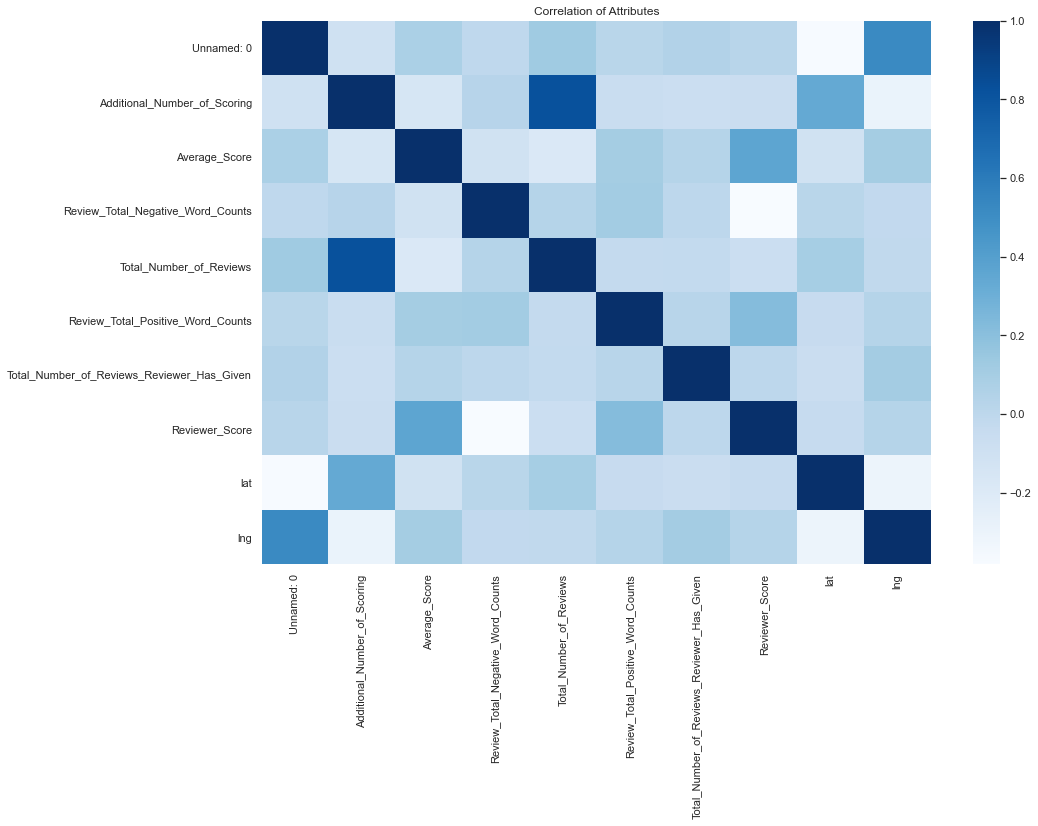

In [9]:
#Correlation Matrix for Continous Variables 

plt.figure(figsize=(15,10))
ax = sns.heatmap(data.corr(),cmap='Blues',annot=False) 
ax.set_title("Correlation of Attributes")
ax

<AxesSubplot:title={'center':'Hotel distribution in States'}>

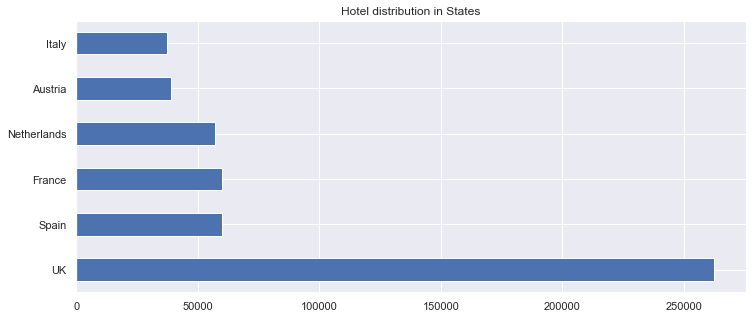

In [12]:
sns.set()
data.Hotel_Address = data.Hotel_Address.str.replace('United Kingdom','UK')
data['State'] = data.Hotel_Address.apply(lambda x: x.split(' ')[-1])
# Now we can check distribution in  and in state
plt.figure(figsize = (12,5))
plt.title('Hotel distribution in States')
data.State.value_counts().plot.barh()

Top 20 hotels sorted by total number of reviews 

In [15]:
data[['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Total_Number_of_Reviews',ascending = False)[:20]

,Hotel_Name,Average_Score,Total_Number_of_Reviews
488409,Hotel Da Vinci,8.1,16670
504027,Park Plaza Westminster Bridge London,8.7,12158
496065,Hotel degli Arcimboldi,8.3,10842
164259,Strand Palace Hotel,8.1,9568
63942,Britannia International Hotel Canary Wharf,7.1,9086
311000,Best Western Premier Hotel Couture,8.7,8177
509232,The Student Hotel Amsterdam City,8.7,7656
379680,Golden Tulip Amsterdam West,8.5,7586
236055,DoubleTree by Hilton Hotel London Tower of London,8.7,7491
404728,Glam Milano,8.8,7371


# Topic Modelling

## Text Preprocessing

In [7]:
import nltk
import gensim.models as gs
from gensim.corpora.dictionary import Dictionary

In [8]:
english_stops = nltk.corpus.stopwords.words('english')

In [9]:
def preprocess_positive_text(text):
    
    # Convert all text to lowercase
    lowercase_text = text.lower()
    
    # Tokenize sentences into individual word tokens
    tokens = nltk.tokenize.word_tokenize(lowercase_text)
    
    # Remove non-alphabetical tokens
    alpha = [t for t in tokens if t.isalpha() == True and t != 'positive' and len(t) >= 2]
    
    # Remove stop words
    nstop = [t for t in alpha if t not in english_stops]
    
    # Lemmatize all tokens 
    words = [nltk.stem.WordNetLemmatizer().lemmatize(t) for t in nstop]
    
    return words

In [10]:
def preprocess_negative_text(text):
    
    # Convert all text to lowercase
    lowercase_text = text.lower()
    
    # Tokenize sentences into individual word tokens
    tokens = nltk.tokenize.word_tokenize(lowercase_text)
    
    # Remove non-alphabetical tokens
    alpha = [t for t in tokens if t.isalpha() == True and t != 'negative' and len(t) >= 2]
    
    # Remove stop words
    nstop = [t for t in alpha if t not in english_stops]
    
    # Lemmatize all tokens 
    words = [nltk.stem.WordNetLemmatizer().lemmatize(t) for t in nstop]
    
    return words

### Tokenize Positive and Negative Reviews

In [11]:
positive_tokens = data['Positive_Review'].apply(preprocess_positive_text)
positive_tokens

0                         [park, outside, hotel, beautiful]
1         [real, complaint, hotel, great, great, locatio...
2         [location, good, staff, ok, cute, hotel, break...
3         [great, location, nice, surroundings, bar, res...
4          [amazing, location, building, romantic, setting]
                                ...                        
515733                                           [location]
515734                 [breakfast, ok, got, earlier, check]
515735                                                   []
515736    [room, enormous, really, comfortable, believe,...
515737                                        [staff, kind]
Name: Positive_Review, Length: 515738, dtype: object

In [12]:
negative_tokens = data['Negative_Review'].apply(preprocess_negative_text)
negative_tokens

0         [angry, made, post, available, via, possible, ...
1                                                        []
2         [room, nice, elderly, bit, difficult, room, tw...
3         [room, dirty, afraid, walk, barefoot, floor, l...
4         [booked, company, line, showed, picture, room,...
                                ...                        
515733           [trolly, staff, help, take, luggage, room]
515734                          [hotel, look, like, surely]
515735     [ac, useless, hot, week, vienna, gave, hot, air]
515736                                                   []
515737                            [floor, work, free, wife]
Name: Negative_Review, Length: 515738, dtype: object

### Most Common Words

In [13]:
from collections import Counter

In [14]:
positive_tokens_flattened = [i for j in positive_tokens for i in j]
len(positive_tokens_flattened)

4899838

In [15]:
negative_tokens_flattened = [i for j in negative_tokens for i in j]
len(negative_tokens_flattened)

4439973

In [16]:
# Count the most common tokens in positive reviews
Counter(positive_tokens_flattened).most_common(10)

[('staff', 196634),
 ('location', 193607),
 ('room', 181116),
 ('hotel', 130109),
 ('good', 112387),
 ('great', 105651),
 ('breakfast', 86374),
 ('friendly', 85354),
 ('helpful', 76183),
 ('nice', 69453)]

In [17]:
# Count the most common tokens in negative reviews
Counter(negative_tokens_flattened).most_common(10)

[('room', 210828),
 ('hotel', 80413),
 ('breakfast', 59224),
 ('small', 49885),
 ('staff', 39979),
 ('nothing', 38789),
 ('bed', 37393),
 ('would', 32291),
 ('could', 32079),
 ('one', 28982)]

## Topic Modelling with Gensim

### Preparating Tokens for LDA

In [18]:
# Create Dictionary from Positive Tokens
dict_positive = Dictionary(positive_tokens)

# Create corpus from Dictionary
positive_corpus = [dict_positive.doc2bow(review) for review in positive_tokens]

In [19]:
# Create Dictionary from Negative Tokens
dict_negative = Dictionary(negative_tokens)

# Create corpus from Dictionary
negative_corpus = [dict_negative.doc2bow(review) for review in negative_tokens]

### LDA Model Function to Get Coherence Score

In [20]:
def lda_topic_optimise(corpus, dictionary, tokens, n):
    
    # Create LDA model from Dictionary and Corpus
    lda_model = gs.LdaMulticore(corpus, 
                                num_topics = n, 
                                id2word = dictionary, 
                                workers = 4, 
                                iterations = 200, 
                                random_state = 421)
    
    # Compute Coherence Value for Positive Model
    coherence_model = gs.CoherenceModel(model = lda_model, 
                                        texts = tokens, 
                                        dictionary = dictionary, 
                                        coherence = 'c_v')
    
    return coherence_model.get_coherence()

### Determine Best Number of Topics

Warning! This section takes about ~30 mins to fully run.

In [21]:
# Define number of topics to investigate
n = [2, 3, 4, 5, 6, 7, 8, 9, 10]

In [22]:
positive_score = [lda_topic_optimise(positive_corpus, dict_positive, positive_tokens, i) for i in n]

In [25]:
negative_score = [lda_topic_optimise(negative_corpus, dict_negative, negative_tokens, i) for i in n]

In [26]:
# View coherence score results in DataFrame
score_results = pd.DataFrame({'No. of Topics': n,
                              'Positive Reviews Coherence Score':  positive_score,
                              'Negative Reviews Coherence Score':  negative_score})
score_results

,No. of Topics,Positive Reviews Coherence Score,Negative Reviews Coherence Score
0,2,0.516239,0.550757
1,3,0.537964,0.585998
2,4,0.557047,0.617030
3,5,0.565002,0.624493
4,6,0.598340,0.640911
5,7,0.604820,0.665077
6,8,0.610968,0.659044
7,9,0.622412,0.671017
8,10,0.608985,0.656256


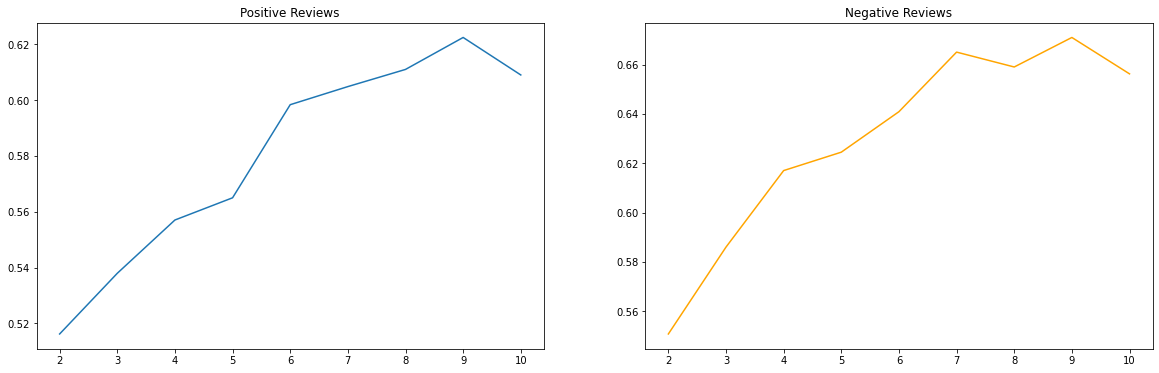

In [27]:
# Visualise coherence score results
plt.rcParams['figure.figsize'] = [20, 6]

fig, axs = plt.subplots(1, 2)

axs[0].plot(score_results['No. of Topics'], score_results['Positive Reviews Coherence Score'])
axs[0].set_title('Positive Reviews')

axs[1].plot(score_results['No. of Topics'], score_results['Negative Reviews Coherence Score'], color = 'orange')
axs[1].set_title('Negative Reviews')

plt.show()

### Building Model with Optimal Number of Topics

In [28]:
import warnings

In [35]:
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.simplefilter("ignore")

In [31]:
positive_model = gs.LdaMulticore(positive_corpus, 
                                 num_topics = 9, 
                                 id2word = dict_positive, 
                                 workers = 4, 
                                 iterations = 200,
                                 random_state = 421)

In [32]:
negative_model = gs.LdaMulticore(negative_corpus, 
                                 num_topics = 7, 
                                 id2word = dict_negative, 
                                 workers = 4, 
                                 iterations = 200,
                                 random_state = 421)

In [33]:
# Print topics in positive_models
topics_p = positive_model.print_topics(num_words = 5)

for topic in topics_p:
    print(topic)

(0, '0.153*"good" + 0.121*"breakfast" + 0.057*"location" + 0.046*"staff" + 0.045*"room"')
(1, '0.167*"location" + 0.079*"great" + 0.065*"hotel" + 0.046*"excellent" + 0.029*"staff"')
(2, '0.048*"hotel" + 0.037*"everything" + 0.020*"room" + 0.018*"time" + 0.015*"check"')
(3, '0.089*"room" + 0.019*"pool" + 0.018*"view" + 0.017*"location" + 0.017*"bathroom"')
(4, '0.028*"room" + 0.025*"staff" + 0.023*"hotel" + 0.021*"u" + 0.019*"stay"')
(5, '0.140*"bed" + 0.107*"comfortable" + 0.104*"room" + 0.060*"clean" + 0.047*"comfy"')
(6, '0.174*"staff" + 0.094*"friendly" + 0.087*"helpful" + 0.057*"location" + 0.056*"great"')
(7, '0.037*"station" + 0.036*"location" + 0.035*"close" + 0.032*"hotel" + 0.022*"metro"')
(8, '0.061*"staff" + 0.030*"helpful" + 0.024*"friendly" + 0.023*"hotel" + 0.017*"free"')


In [34]:
# Print topics in negative_models
topics_n = negative_model.print_topics(num_words = 5)

for topic in topics_n:
    print(topic)

(0, '0.026*"hotel" + 0.020*"shower" + 0.018*"pool" + 0.017*"room" + 0.016*"location"')
(1, '0.059*"room" + 0.023*"staff" + 0.016*"air" + 0.014*"water" + 0.014*"coffee"')
(2, '0.097*"breakfast" + 0.030*"expensive" + 0.027*"wifi" + 0.026*"room" + 0.021*"poor"')
(3, '0.044*"hotel" + 0.037*"room" + 0.013*"booking" + 0.012*"u" + 0.011*"would"')
(4, '0.023*"day" + 0.021*"check" + 0.019*"staff" + 0.017*"time" + 0.016*"room"')
(5, '0.123*"room" + 0.058*"bed" + 0.056*"small" + 0.022*"bathroom" + 0.013*"bit"')
(6, '0.086*"nothing" + 0.037*"room" + 0.026*"noise" + 0.021*"hotel" + 0.021*"noisy"')


## Visualise Topic Modelling with pyLDAvis

Warning! This section takes ~5 to 10 mins to fully run.

In [36]:
import pyLDAvis.gensim_models

In [39]:
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [40]:
positive_display = pyLDAvis.gensim_models.prepare(positive_model, 
                                           positive_corpus, 
                                           dict_positive, 
                                           sort_topics = False)

In [41]:
pyLDAvis.display(positive_display)

In [42]:
negative_display = pyLDAvis.gensim_models.prepare(negative_model, 
                                           negative_corpus, 
                                           dict_negative, 
                                           sort_topics = False)

In [43]:
pyLDAvis.display(negative_display)

## Predicting Topic For Each Document (Review)

Warning! This section takes ~10 mins to fully run.

In [44]:
def get_topic(token, dictionary, model):
    
    if len(token) > 0:
        # Create dictionary of bag-of-words from tokens
        doc_bow = dictionary.doc2bow(token)
    
        # Determine topic distribution based on trained model
        topics  = sorted(model[doc_bow], key = lambda x: x[1], reverse = True)
    
        # Return topic with highest probability
        return topics[0][0]
    
    else:
        return np.nan

In [45]:
# Generate topic with highest score for all positive reviews
positive_topic = []

for i in range(0, len(positive_tokens)):

    positive_topic.append(get_topic(positive_tokens[i], dict_positive, positive_model))

In [46]:
# Generate topic with highest score for all negative reviews
negative_topic = []

for i in range(0, len(negative_tokens)):
    
    negative_topic.append(get_topic(negative_tokens[i], dict_negative, negative_model))

In [47]:
# Add list of positive and negative topics as feature 
data['Positive_Topic'] = positive_topic
data['Negative_Topic'] = negative_topic

In [49]:
data['Positive_Topic'].value_counts()

6.0    85084
1.0    77656
7.0    72613
0.0    57978
3.0    44141
5.0    43091
2.0    41543
4.0    34202
8.0    22691
Name: Positive_Topic, dtype: int64

In [50]:
data['Negative_Topic'].value_counts()

5.0    69958
6.0    69487
2.0    58414
1.0    57234
0.0    47833
3.0    46771
4.0    34925
Name: Negative_Topic, dtype: int64

## Business Insights and Applications of Topic Modelling

In [51]:
data_2 = data[['Hotel_Name', 'Positive_Topic', 'Negative_Topic']]
data_2.head()

,Hotel_Name,Positive_Topic,Negative_Topic
0,Hotel Arena,7.0,3.0
1,Hotel Arena,4.0,NaN
2,Hotel Arena,0.0,1.0
3,Hotel Arena,3.0,0.0
4,Hotel Arena,6.0,3.0


In [52]:
# Remove hotels with less than 100 reviews 
hotel_list = list(data_2['Hotel_Name'].value_counts()[data_2['Hotel_Name'].value_counts() > 100].index)
len(hotel_list)

1074

In [53]:
# Group by Hotel and Positive_Topic
hotel_positive = data_2[['Hotel_Name', 'Positive_Topic']]\
                       .dropna()\
                       .groupby(['Hotel_Name', 'Positive_Topic'])\
                       .size()\
                       .reset_index(name = 'Counts')

In [54]:
hotel_positive

,Hotel_Name,Positive_Topic,Counts
0,11 Cadogan Gardens,0.0,10
1,11 Cadogan Gardens,1.0,23
2,11 Cadogan Gardens,2.0,25
3,11 Cadogan Gardens,3.0,10
4,11 Cadogan Gardens,4.0,24
...,...,...,...
13184,pentahotel Vienna,4.0,7
13185,pentahotel Vienna,5.0,11
13186,pentahotel Vienna,6.0,17
13187,pentahotel Vienna,7.0,10


In [55]:
# Group by Hotel and Negative Topic
hotel_negative = data_2[['Hotel_Name', 'Negative_Topic']]\
                       .dropna()\
                       .groupby(['Hotel_Name', 'Negative_Topic'])\
                       .size()\
                       .reset_index(name = 'Counts')

In [56]:
hotel_negative

,Hotel_Name,Negative_Topic,Counts
0,11 Cadogan Gardens,0.0,11
1,11 Cadogan Gardens,1.0,17
2,11 Cadogan Gardens,2.0,9
3,11 Cadogan Gardens,3.0,19
4,11 Cadogan Gardens,4.0,8
...,...,...,...
10315,pentahotel Vienna,2.0,27
10316,pentahotel Vienna,3.0,15
10317,pentahotel Vienna,4.0,9
10318,pentahotel Vienna,5.0,9


### Examine Topics for a Random Hotel

In [57]:
# Remove hotels with less than 1000 reviews 
hotel_list = list(data_2['Hotel_Name'].value_counts()[data_2['Hotel_Name'].value_counts() > 1000].index)
len(hotel_list)

101

In [58]:
import random

In [59]:
random.seed(4)

In [60]:
# Randomly sample a hotel from this list
random_hotel = random.sample(hotel_list, 1)
random_hotel

['Club Quarters Hotel St Paul s']

In [61]:
positive_random_analysis = hotel_positive[hotel_positive['Hotel_Name'] == random_hotel[0]]
positive_random_analysis

,Hotel_Name,Positive_Topic,Counts
2053,Club Quarters Hotel St Paul s,0.0,139
2054,Club Quarters Hotel St Paul s,1.0,314
2055,Club Quarters Hotel St Paul s,2.0,91
2056,Club Quarters Hotel St Paul s,3.0,204
2057,Club Quarters Hotel St Paul s,4.0,64
2058,Club Quarters Hotel St Paul s,5.0,100
2059,Club Quarters Hotel St Paul s,6.0,197
2060,Club Quarters Hotel St Paul s,7.0,264
2061,Club Quarters Hotel St Paul s,8.0,150


In [62]:
plt.rcParams['figure.figsize'] = [8, 6]

<AxesSubplot:xlabel='Positive_Topic'>

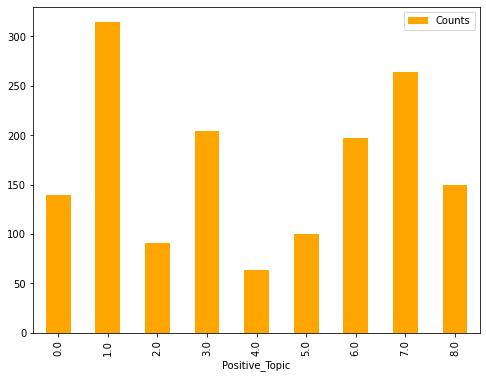

In [63]:
positive_random_analysis.plot(x = 'Positive_Topic', y = 'Counts', kind = 'bar', color = 'orange')

In [64]:
negative_random_analysis = hotel_negative[hotel_negative['Hotel_Name'] == random_hotel[0]]
negative_random_analysis

,Hotel_Name,Negative_Topic,Counts
1604,Club Quarters Hotel St Paul s,0.0,109
1605,Club Quarters Hotel St Paul s,1.0,223
1606,Club Quarters Hotel St Paul s,2.0,103
1607,Club Quarters Hotel St Paul s,3.0,106
1608,Club Quarters Hotel St Paul s,4.0,96
1609,Club Quarters Hotel St Paul s,5.0,218
1610,Club Quarters Hotel St Paul s,6.0,311


<AxesSubplot:xlabel='Negative_Topic'>

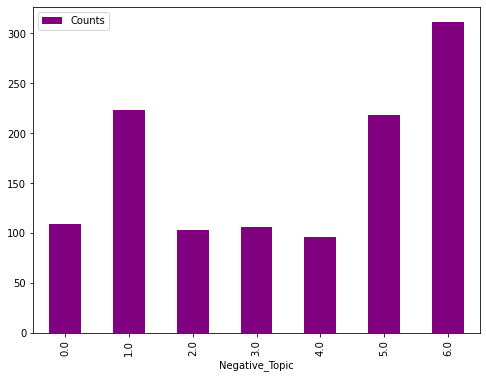

In [65]:
negative_random_analysis.plot(x = 'Negative_Topic', y = 'Counts', kind = 'bar', color = 'purple')

# Sentiment Analysis with AFINN

Warning! This section takes around ~15 mins to fully run.

In [66]:
from afinn import Afinn

In [67]:
afinn = Afinn()
afinn_scores_pos = [afinn.score(text) for text in data['Positive_Review']]
afinn_scores_neg = [afinn.score(text) for text in data['Negative_Review']]

In [68]:
# Add positive and negative sentiments as feature
data['pos_afinn'] = afinn_scores_pos
data['neg_afinn'] = afinn_scores_neg

## Insights into Sentiment by Hotels

In [69]:
df_pos = data[['Hotel_Name','Positive_Topic','pos_afinn']].sort_values(by = 'Hotel_Name', ascending = False)
df_pos

,Hotel_Name,Positive_Topic,pos_afinn
376898,pentahotel Vienna,6.0,0.0
376882,pentahotel Vienna,0.0,3.0
376880,pentahotel Vienna,0.0,6.0
376879,pentahotel Vienna,1.0,0.0
376878,pentahotel Vienna,2.0,0.0
...,...,...,...
33808,11 Cadogan Gardens,3.0,3.0
33807,11 Cadogan Gardens,1.0,3.0
33806,11 Cadogan Gardens,6.0,7.0
33805,11 Cadogan Gardens,8.0,7.0


In [70]:
df_pos_hotel = df_pos.groupby(["Hotel_Name", "Positive_Topic"], dropna = True).mean()
df_pos_hotel[:18]

pos_afinn
Hotel_Name         Positive_Topic           
11 Cadogan Gardens 0.0              7.100000
                   1.0              5.130435
                   2.0              7.360000
                   3.0              8.200000
                   4.0              7.625000
                   5.0              4.111111
                   6.0              5.058824
                   7.0              8.000000
                   8.0              6.500000
1K Hotel           0.0              6.333333
                   1.0              5.312500
                   2.0              7.166667
                   3.0              3.315789
                   4.0              4.857143
                   5.0              2.750000
                   6.0              4.944444
                   7.0              7.312500
                   8.0              9.000000

In [71]:
df_neg = data[['Hotel_Name','Negative_Topic','neg_afinn']].sort_values(by = 'Hotel_Name', ascending = False)
df_neg

,Hotel_Name,Negative_Topic,neg_afinn
376898,pentahotel Vienna,1.0,-1.0
376882,pentahotel Vienna,3.0,0.0
376880,pentahotel Vienna,6.0,-2.0
376879,pentahotel Vienna,NaN,-3.0
376878,pentahotel Vienna,2.0,0.0
...,...,...,...
33808,11 Cadogan Gardens,1.0,0.0
33807,11 Cadogan Gardens,NaN,-3.0
33806,11 Cadogan Gardens,0.0,0.0
33805,11 Cadogan Gardens,NaN,-3.0


In [72]:
df_neg_hotel = df_neg.groupby(["Hotel_Name", "Negative_Topic"], dropna=True).mean()
df_neg_hotel[:14]

neg_afinn
Hotel_Name         Negative_Topic           
11 Cadogan Gardens 0.0             -0.545455
                   1.0             -1.647059
                   2.0              1.111111
                   3.0              0.000000
                   4.0             -0.250000
                   5.0              0.944444
                   6.0             -0.645161
1K Hotel           0.0             -0.884615
                   1.0             -0.791667
                   2.0             -0.700000
                   3.0             -3.142857
                   4.0             -1.461538
                   5.0             -0.400000
                   6.0             -1.111111

In [73]:
# Write data to file for consistency
# data.to_csv('Hotel_Reviews_with_text_features.csv', index = False)

# Supervised Learning

## Data Processing and Aggregation of Results

In [4]:
# Reading in the data if needed
data = pd.read_csv('Hotel_Reviews_with_text_features.csv')

In [5]:
# Convert days_since_review to numeric
data['days_since_review'] = data['days_since_review'].str.strip(' days').astype(int)

In [6]:
# Transform "Positive_Topic", "Negative_Topic", "Trip_purpose", "trip_companions", "room_type" columns into categorical dummy variables
data_3 = pd.get_dummies(data, columns = ['Trip_purpose', 'trip_companions', 'room_type', 'Positive_Topic', 'Negative_Topic'])
data_3.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'days_since_review', 'lat', 'lng', 'pos_afinn', 'neg_afinn',
       'Trip_purpose_Business', 'Trip_purpose_Leisure',
       'trip_companions_Couple', 'trip_companions_Family',
       'trip_companions_Group', 'trip_companions_Solo', 'room_type_Double',
       'room_type_King', 'room_type_Queen', 'room_type_Single',
       'room_type_Suite', 'room_type_Triple', 'Positive_Topic_0.0',
       'Positive_Topic_1.0', 'Positive_Topic_2.0', 'Positive_Topic_3.0',
       'Positive_Topic_4.0', 'Positive_Topic_5.0', 'Positive_Topic_6.0',
       'Positive_Topic_7.0', 'Positive_Topic_8.0', 'Negative_Topic_0.0',
       'Negative_Topic_1.0

In [7]:
# Aggregate results by Hotel 
data_4 = data_3.drop(columns = ['Hotel_Address', 'Review_Date', 'Reviewer_Nationality',
                                'Negative_Review', 'Positive_Review', 'lat', 'days_since_review', 
                                'lng', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Average_Score'])\
               .groupby('Hotel_Name')\
               .mean()

data_4.head()

,Additional_Number_of_Scoring,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Reviewer_Score,pos_afinn,neg_afinn,Trip_purpose_Business,Trip_purpose_Leisure,trip_companions_Couple,trip_companions_Family,trip_companions_Group,trip_companions_Solo,room_type_Double,room_type_King,room_type_Queen,room_type_Single,room_type_Suite,room_type_Triple,Positive_Topic_0.0,Positive_Topic_1.0,Positive_Topic_2.0,Positive_Topic_3.0,Positive_Topic_4.0,Positive_Topic_5.0,Positive_Topic_6.0,Positive_Topic_7.0,Positive_Topic_8.0,Negative_Topic_0.0,Negative_Topic_1.0,Negative_Topic_2.0,Negative_Topic_3.0,Negative_Topic_4.0,Negative_Topic_5.0,Negative_Topic_6.0
Hotel_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Cadogan Gardens,101.0,15.528302,393.0,19.974843,8.845283,6.081761,-1.050314,0.169811,0.823899,0.566038,0.119497,0.081761,0.232704,0.000000,0.301887,0.641509,0.006289,0.025157,0.0,0.062893,0.144654,0.157233,0.062893,0.150943,0.056604,0.213836,0.056604,0.037736,0.069182,0.106918,0.056604,0.119497,0.050314,0.113208,0.194969
1K Hotel,69.0,24.932432,663.0,15.601351,7.861486,4.858108,-1.337838,0.209459,0.777027,0.472973,0.074324,0.114865,0.331081,0.932432,0.000000,0.000000,0.006757,0.054054,0.0,0.141892,0.108108,0.081081,0.128378,0.047297,0.135135,0.121622,0.108108,0.033784,0.175676,0.162162,0.135135,0.047297,0.087838,0.101351,0.121622
25hours Hotel beim MuseumsQuartier,391.0,16.161103,4324.0,21.911466,8.983309,7.198839,-0.899855,0.158200,0.827286,0.544267,0.120464,0.142235,0.185776,0.869376,0.000000,0.000000,0.000000,0.111756,0.0,0.069666,0.185776,0.081277,0.145138,0.082729,0.059507,0.179971,0.079826,0.071118,0.060958,0.101597,0.087083,0.076923,0.044993,0.153846,0.132075
41,66.0,8.883495,244.0,25.300971,9.711650,6.757282,-0.980583,0.087379,0.893204,0.679612,0.126214,0.077670,0.116505,0.000000,0.951456,0.000000,0.000000,0.048544,0.0,0.038835,0.174757,0.184466,0.009709,0.339806,0.019417,0.087379,0.000000,0.145631,0.038835,0.019417,0.019417,0.067961,0.067961,0.019417,0.291262
45 Park Lane Dorchester Collection,27.0,6.750000,68.0,11.535714,9.603571,4.107143,-0.857143,0.250000,0.678571,0.571429,0.107143,0.000000,0.321429,0.000000,0.535714,0.285714,0.000000,0.000000,0.0,0.035714,0.250000,0.214286,0.071429,0.071429,0.142857,0.071429,0.000000,0.107143,0.000000,0.035714,0.142857,0.035714,0.035714,0.035714,0.357143


## Model Building and Selection with pycaret

In [8]:
from pycaret.regression import *

In [9]:
model = setup(data_4, target = 'Reviewer_Score', session_id = 456, n_jobs = 4)

,Description,Value
0,session_id,456
1,Target,Reviewer_Score
2,Original Data,"(1492, 35)"
3,Missing Values,False
4,Numeric Features,34
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1044, 34)"


In [79]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.1736,0.0526,0.2283,0.8686,0.0248,0.0209,1.0050
br,Bayesian Ridge,0.1734,0.0527,0.2285,0.8684,0.0249,0.0209,0.0130
catboost,CatBoost Regressor,0.1668,0.0540,0.2306,0.8660,0.0257,0.0203,3.9600
gbr,Gradient Boosting Regressor,0.1754,0.0568,0.2374,0.8582,0.0261,0.0213,0.2930
ridge,Ridge Regression,0.1833,0.0585,0.2407,0.8544,0.0263,0.0221,0.0190
et,Extra Trees Regressor,0.1809,0.0594,0.2428,0.8522,0.0269,0.0220,0.3010
lightgbm,Light Gradient Boosting Machine,0.1795,0.0601,0.2440,0.8501,0.0269,0.0218,0.5300
rf,Random Forest Regressor,0.1892,0.0635,0.2510,0.8417,0.0277,0.0230,0.5610
ada,AdaBoost Regressor,0.2337,0.0876,0.2952,0.7819,0.0325,0.0281,0.1390
omp,Orthogonal Matching Pursuit,0.2288,0.0928,0.3034,0.7694,0.0331,0.0276,0.0070


### Linear Regression Model

In [24]:
lr = create_model('lr', fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1723,0.0471,0.2171,0.8890,0.0236,0.0208
1,0.1572,0.0413,0.2032,0.8881,0.0221,0.0186
2,0.1628,0.0556,0.2358,0.8793,0.0257,0.0196
3,0.1645,0.0471,0.2170,0.8762,0.0241,0.0201
4,0.1913,0.0614,0.2478,0.8483,0.0265,0.0228
5,0.1946,0.0658,0.2566,0.8259,0.0277,0.0235
6,0.1833,0.0616,0.2483,0.8321,0.0259,0.0215
7,0.1754,0.0507,0.2252,0.8656,0.0245,0.0213
8,0.1488,0.0349,0.1867,0.9146,0.0203,0.0180
9,0.1862,0.0602,0.2453,0.8664,0.0275,0.0227


In [25]:
lr_tuned = pull()
lr_result = lr_tuned.iloc[[10]].rename(index={'Mean':'Linear Regression'})
lr_result

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Linear Regression,0.1736,0.0526,0.2283,0.8686,0.0248,0.0209


In [26]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=False)

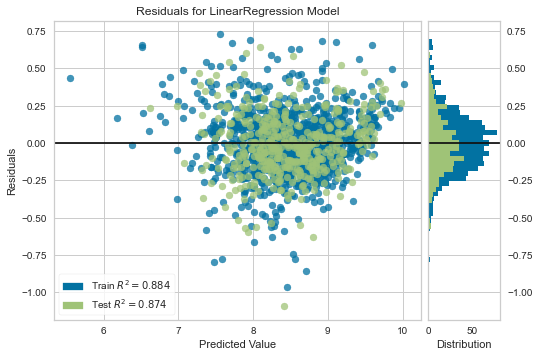

In [27]:
plot_model(lr)

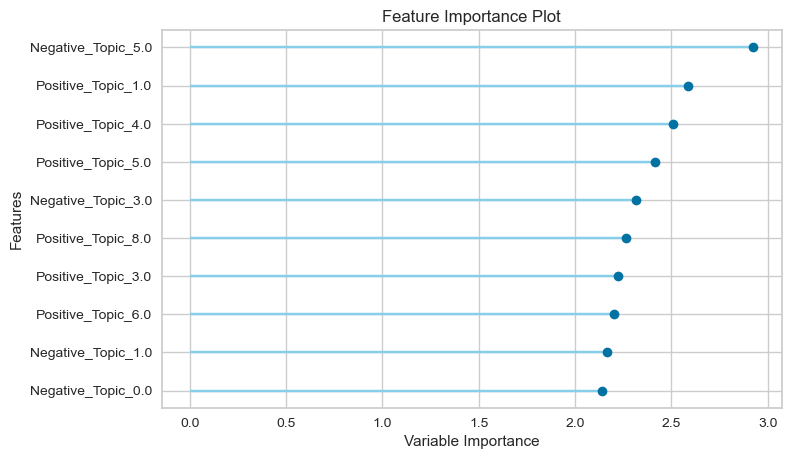

In [28]:
#Feature Importance plot
plot_model(lr, plot = 'feature')

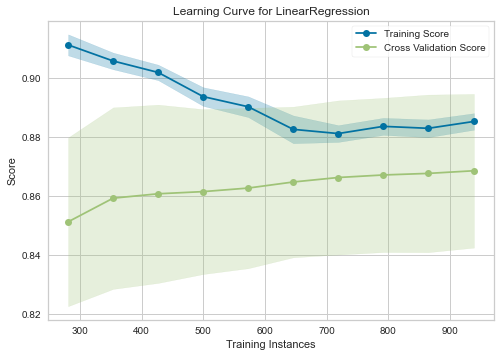

In [29]:
# Learning Curve
plot_model(lr, plot = 'learning')

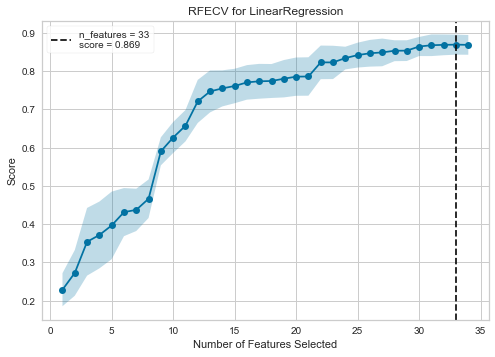

In [30]:
# Feature Selection (recursive)
plot_model(lr, plot = 'rfe')

In [31]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [32]:
lr_res = predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.1601,0.0433,0.2082,0.8744,0.0223,0.0191


In [33]:
lr_res_summary = pull()

### Ridge Regression Model

In [34]:
ridge = create_model('ridge', fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1884,0.0603,0.2455,0.8580,0.0282,0.0232
1,0.1750,0.0507,0.2252,0.8626,0.0244,0.0208
2,0.1836,0.0663,0.2574,0.8562,0.0283,0.0222
3,0.1729,0.0541,0.2326,0.8578,0.0259,0.0211
4,0.2023,0.0644,0.2537,0.8410,0.0272,0.0241
5,0.1866,0.0624,0.2498,0.8350,0.0270,0.0226
6,0.1983,0.0679,0.2605,0.8151,0.0272,0.0233
7,0.1640,0.0474,0.2176,0.8744,0.0238,0.0199
8,0.1489,0.0347,0.1864,0.9149,0.0202,0.0180
9,0.2130,0.0773,0.2780,0.8285,0.0312,0.0260


In [35]:
ridger = tune_model(ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1908,0.0627,0.2504,0.8523,0.0289,0.0235
1,0.1793,0.0530,0.2303,0.8564,0.0249,0.0213
2,0.1874,0.0688,0.2623,0.8507,0.0288,0.0226
3,0.1741,0.0549,0.2342,0.8558,0.0261,0.0213
4,0.2034,0.0654,0.2557,0.8385,0.0275,0.0243
5,0.1860,0.0626,0.2503,0.8343,0.0270,0.0225
6,0.2015,0.0689,0.2625,0.8122,0.0275,0.0237
7,0.1652,0.0483,0.2198,0.8720,0.0241,0.0201
8,0.1503,0.0355,0.1883,0.9131,0.0204,0.0182
9,0.2144,0.0778,0.2789,0.8273,0.0313,0.0262


In [36]:
ridge_tuned = pull()
ridge_result = ridge_tuned.iloc[[10]].rename(index={'Mean':'Ridge Regression'})
ridge_result

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Ridge Regression,0.1853,0.0598,0.2433,0.8513,0.0266,0.0224


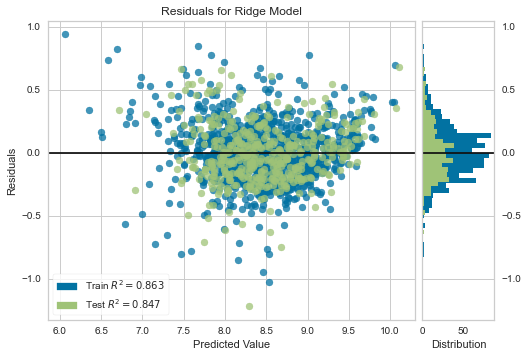

In [37]:
plot_model(ridger)

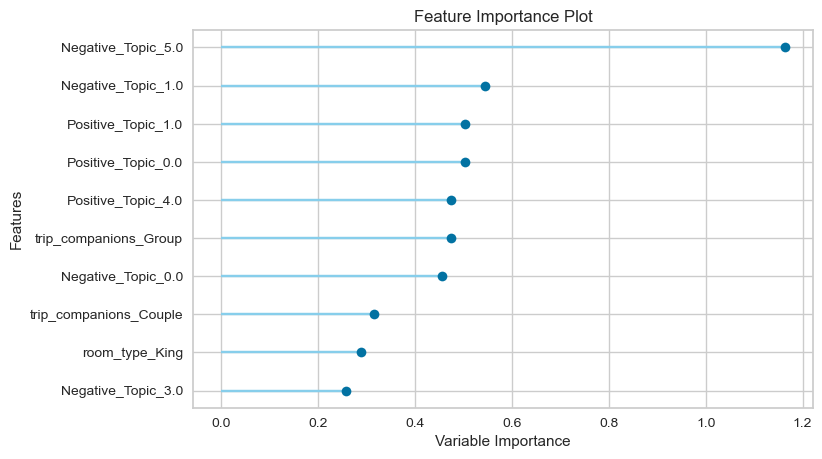

In [38]:
#Feature Importance plot
plot_model(ridger, plot = 'feature')

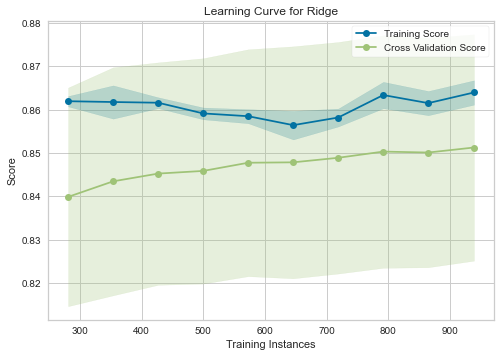

In [39]:
# Learning Curve
plot_model(ridger, plot = 'learning')

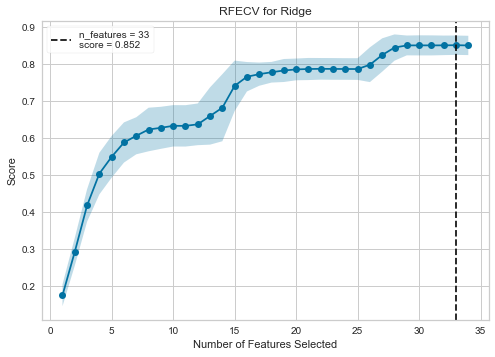

In [40]:
# Feature Selection (recursive)
plot_model(ridger, plot = 'rfe')

In [41]:
evaluate_model(ridger)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [42]:
ridge_res = predict_model(ridger)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,0.1762,0.0529,0.2299,0.8468,0.0248,0.0211


In [43]:
ridge_res_summary = pull()

### Bayesian Ridge Regression

In [44]:
bridge = create_model('br', fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1742,0.0481,0.2192,0.8868,0.0242,0.0212
1,0.1565,0.0417,0.2042,0.8871,0.0222,0.0185
2,0.1663,0.0570,0.2387,0.8764,0.0260,0.0200
3,0.1635,0.0475,0.2180,0.8751,0.0242,0.0200
4,0.1878,0.0576,0.2399,0.8578,0.0256,0.0223
5,0.1952,0.0663,0.2575,0.8247,0.0277,0.0236
6,0.1831,0.0628,0.2505,0.8290,0.0260,0.0214
7,0.1699,0.0482,0.2196,0.8721,0.0239,0.0206
8,0.1456,0.0338,0.1838,0.9172,0.0200,0.0176
9,0.1917,0.0643,0.2535,0.8574,0.0285,0.0234


In [45]:
bridger = tune_model(bridge, n_iter =50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1718,0.0469,0.2167,0.8894,0.0238,0.0208
1,0.1557,0.0409,0.2023,0.8892,0.0220,0.0184
2,0.1649,0.0572,0.2392,0.8758,0.0261,0.0198
3,0.1620,0.0462,0.2148,0.8787,0.0239,0.0198
4,0.1853,0.0565,0.2378,0.8603,0.0254,0.0220
5,0.1969,0.0677,0.2603,0.8209,0.0280,0.0238
6,0.1822,0.0623,0.2496,0.8303,0.0259,0.0213
7,0.1719,0.0494,0.2223,0.8690,0.0242,0.0208
8,0.1475,0.0345,0.1857,0.9155,0.0203,0.0179
9,0.1849,0.0598,0.2446,0.8672,0.0276,0.0226


In [46]:
bridge_tuned = pull()
bridge_result = bridge_tuned.iloc[[10]].rename(index={'Mean':'Bayesian Ridge Regression'})
bridge_result

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Bayesian Ridge Regression,0.1723,0.0522,0.2273,0.8696,0.0247,0.0207


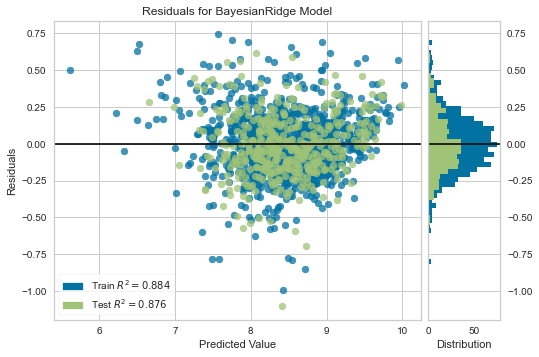

In [47]:
plot_model(bridger)

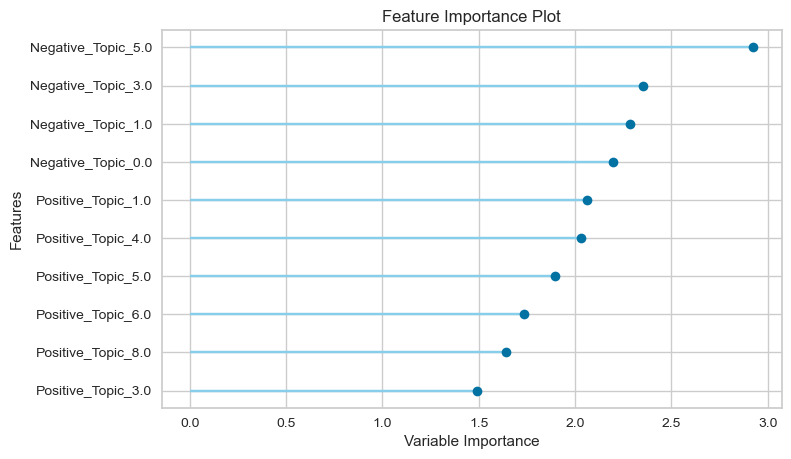

In [48]:
#Feature Importance plot
plot_model(bridger, plot = 'feature')

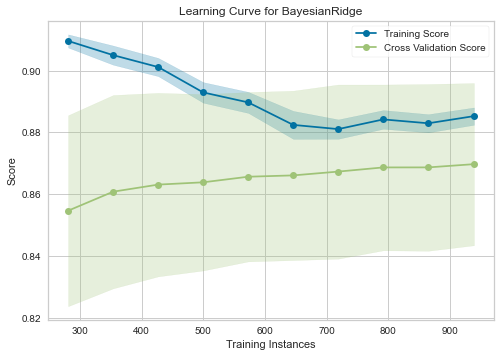

In [49]:
# Learning Curve
plot_model(bridger, plot = 'learning')

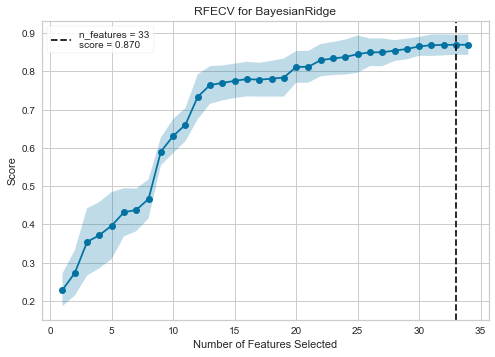

In [50]:
# Feature Selection (recursive)
plot_model(bridger, plot = 'rfe')

In [51]:
evaluate_model(bridger)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [52]:
bridge_res = predict_model(bridger)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.1589,0.0429,0.2072,0.8756,0.0222,0.0190


In [53]:
bridge_res_summary = pull()

### Decision Tree Model

In [54]:
dt = create_model('dt', fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3021,0.1553,0.3941,0.6341,0.0439,0.0370
1,0.2227,0.0838,0.2895,0.7730,0.0306,0.0263
2,0.2752,0.1634,0.4043,0.6453,0.0443,0.0330
3,0.2924,0.1293,0.3595,0.6604,0.0398,0.0355
4,0.3005,0.1458,0.3818,0.6399,0.0403,0.0355
5,0.2664,0.1299,0.3604,0.6565,0.0389,0.0324
6,0.2728,0.1282,0.3581,0.6506,0.0393,0.0328
7,0.2534,0.1086,0.3295,0.7123,0.0363,0.0307
8,0.2593,0.1041,0.3227,0.7447,0.0349,0.0313
9,0.2835,0.1573,0.3966,0.6508,0.0435,0.0341


In [55]:
dtr = tune_model(dt, n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2464,0.1016,0.3188,0.7606,0.0357,0.0302
1,0.2153,0.0744,0.2727,0.7986,0.0293,0.0256
2,0.2310,0.1023,0.3199,0.7780,0.0354,0.0280
3,0.2401,0.0903,0.3005,0.7628,0.0332,0.0293
4,0.2971,0.1450,0.3808,0.6419,0.0409,0.0356
5,0.2552,0.1114,0.3337,0.7055,0.0362,0.0310
6,0.2496,0.1002,0.3165,0.7270,0.0344,0.0300
7,0.2319,0.1009,0.3176,0.7327,0.0348,0.0285
8,0.2184,0.0807,0.2841,0.8021,0.0310,0.0266
9,0.2387,0.1088,0.3299,0.7584,0.0357,0.0288


In [56]:
dt_tuned = pull()
dt_result = dt_tuned.iloc[[10]].rename(index={'Mean':'Decision Tree'})
dt_result

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Decision Tree,0.2424,0.1016,0.3174,0.7468,0.0347,0.0294


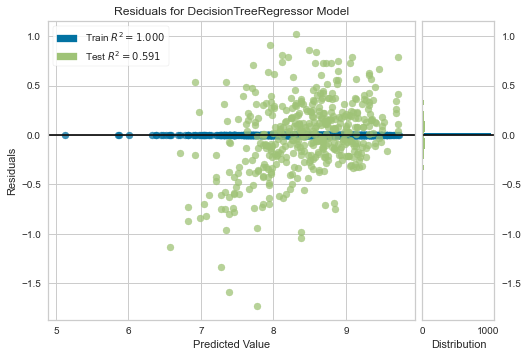

In [57]:
plot_model(dt)

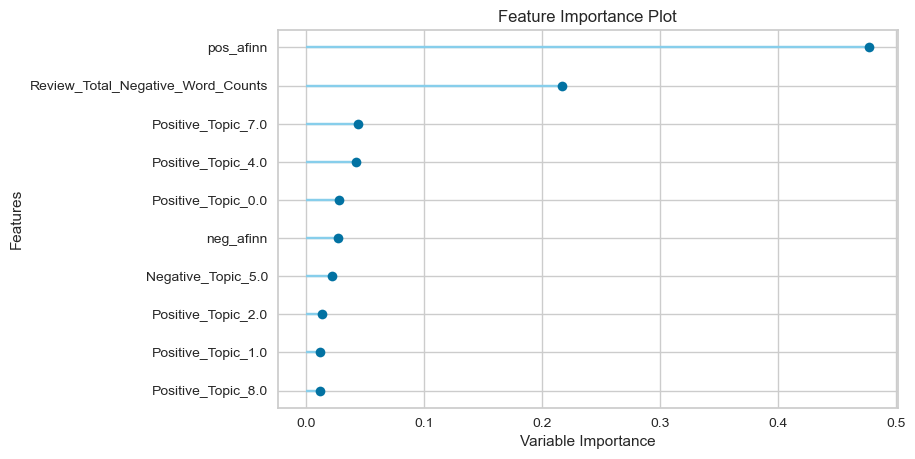

In [58]:
#Feature Importance plot
plot_model(dtr, plot = 'feature')

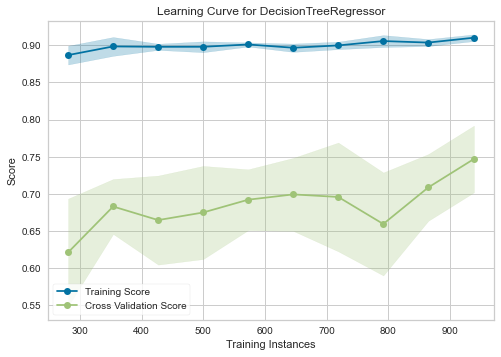

In [59]:
# Learning Curve
plot_model(dtr, plot = 'learning')

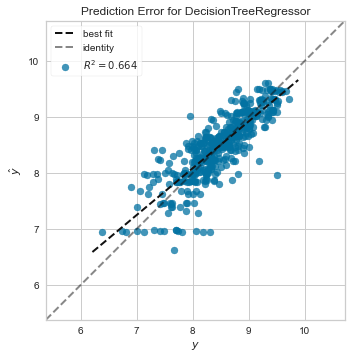

In [60]:
# Prediction Fit/Error
plot_model(dtr, plot = 'error')

In [61]:
#Hyperparameters
plot_model(dtr, plot = 'parameter')

,Parameters
ccp_alpha,0.0
criterion,mae
max_depth,12
max_features,1.0
max_leaf_nodes,None
min_impurity_decrease,0.0001
min_impurity_split,None
min_samples_leaf,6
min_samples_split,5
min_weight_fraction_leaf,0.0


In [62]:
dtr

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=12,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.0001, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=456, splitter='best')

In [63]:
evaluate_model(dtr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [64]:
dt_res = predict_model(dtr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.2499,0.1158,0.3403,0.6643,0.0374,0.0302


In [65]:
dt_res_summary = pull()

### Random Forest Model

In [66]:
rf = create_model('rf', fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1968,0.0671,0.2591,0.8419,0.0309,0.0245
1,0.1780,0.0520,0.2281,0.8591,0.0242,0.0210
2,0.1845,0.0638,0.2525,0.8616,0.0280,0.0224
3,0.1822,0.0591,0.2432,0.8446,0.0276,0.0225
4,0.2143,0.0706,0.2658,0.8256,0.0287,0.0257
5,0.1841,0.0722,0.2687,0.8091,0.0291,0.0224
6,0.1893,0.0639,0.2529,0.8258,0.0270,0.0224
7,0.1976,0.0659,0.2567,0.8253,0.0284,0.0244
8,0.1582,0.0392,0.1981,0.9038,0.0216,0.0192
9,0.2075,0.0810,0.2846,0.8202,0.0317,0.0254


In [67]:
rfr = tune_model(rf, n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1994,0.0697,0.2640,0.8359,0.0313,0.0248
1,0.1829,0.0550,0.2345,0.8510,0.0248,0.0216
2,0.1929,0.0673,0.2593,0.8540,0.0288,0.0234
3,0.1863,0.0612,0.2475,0.8391,0.0280,0.0230
4,0.2183,0.0749,0.2737,0.8149,0.0296,0.0262
5,0.1909,0.0745,0.2729,0.8030,0.0295,0.0232
6,0.1955,0.0661,0.2571,0.8200,0.0275,0.0232
7,0.1996,0.0679,0.2606,0.8201,0.0286,0.0245
8,0.1654,0.0421,0.2052,0.8968,0.0224,0.0201
9,0.2108,0.0826,0.2874,0.8166,0.0319,0.0258


In [68]:
rf_tuned = pull()
rf_result =rf_tuned.iloc[[10]].rename(index={'Mean':'Random Forest'})
rf_result

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Random Forest,0.1942,0.0661,0.2562,0.8351,0.0282,0.0236


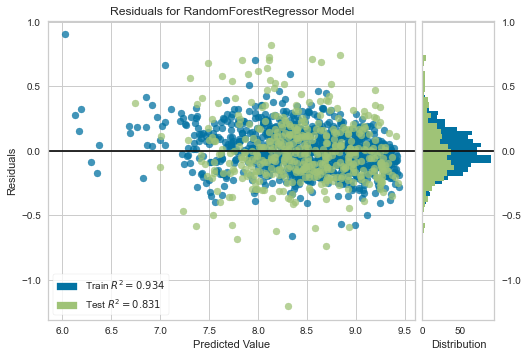

In [69]:
plot_model(rfr)

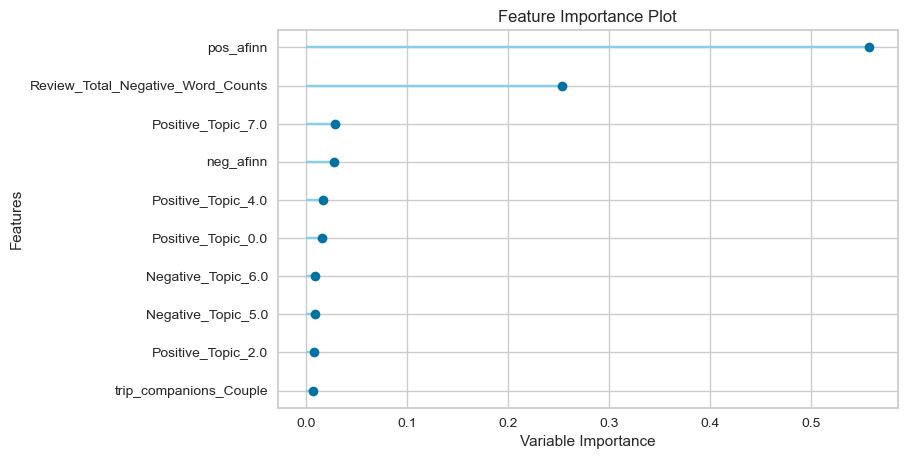

In [70]:
#Feature Importance plot
plot_model(rfr, plot = 'feature')

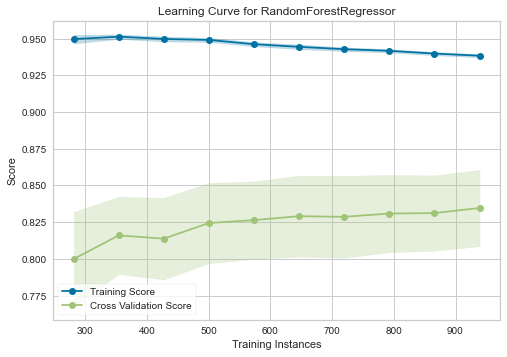

In [71]:
# Learning Curve
plot_model(rfr, plot = 'learning')

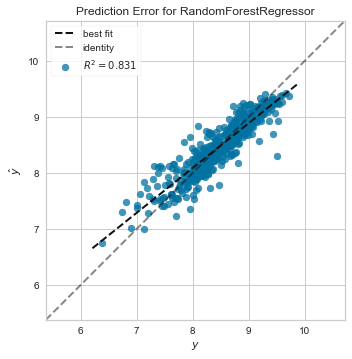

In [72]:
# Prediction Fit/Error
plot_model(rfr, plot = 'error')

In [73]:
#Hyperparameters
plot_model(rfr, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,mse
max_depth,11
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0005
min_impurity_split,None
min_samples_leaf,2


In [74]:
rfr

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=11, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0005,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=190, n_jobs=4, oob_score=False,
                      random_state=456, verbose=0, warm_start=False)

In [75]:
evaluate_model(rfr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [76]:
rf_res = predict_model(rfr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.1797,0.0584,0.2417,0.8306,0.0262,0.0216


In [77]:
rf_res_summary = pull()

### Gradient Boost Regression Model

In [78]:
gbr = create_model('gbr', fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1788,0.0595,0.2440,0.8598,0.0281,0.0221
1,0.1706,0.0495,0.2224,0.8660,0.0236,0.0202
2,0.1706,0.0515,0.2268,0.8883,0.0253,0.0208
3,0.1770,0.0573,0.2393,0.8495,0.0273,0.0220
4,0.1832,0.0593,0.2435,0.8536,0.0261,0.0218
5,0.1703,0.0647,0.2544,0.8289,0.0272,0.0205
6,0.1767,0.0566,0.2380,0.8457,0.0257,0.0211
7,0.1728,0.0568,0.2384,0.8493,0.0260,0.0211
8,0.1523,0.0356,0.1887,0.9127,0.0204,0.0183
9,0.2015,0.0775,0.2784,0.8280,0.0311,0.0247


In [79]:
gbrr = tune_model(gbr, n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1787,0.0579,0.2406,0.8637,0.0279,0.0222
1,0.1714,0.0490,0.2214,0.8672,0.0235,0.0203
2,0.1735,0.0585,0.2419,0.8730,0.0267,0.0211
3,0.1808,0.0564,0.2375,0.8518,0.0268,0.0224
4,0.1839,0.0607,0.2463,0.8501,0.0262,0.0218
5,0.1822,0.0653,0.2556,0.8272,0.0275,0.0220
6,0.1734,0.0536,0.2316,0.8539,0.0249,0.0206
7,0.1751,0.0599,0.2448,0.8411,0.0265,0.0213
8,0.1487,0.0339,0.1842,0.9168,0.0198,0.0178
9,0.2043,0.0687,0.2620,0.8476,0.0292,0.0249


In [80]:
gbr_tuned = pull()
gbr_result =gbr_tuned.iloc[[10]].rename(index={'Mean':'Gradient Boost Regression'})
gbr_result

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Gradient Boost Regression,0.1772,0.0564,0.2366,0.8593,0.0259,0.0214


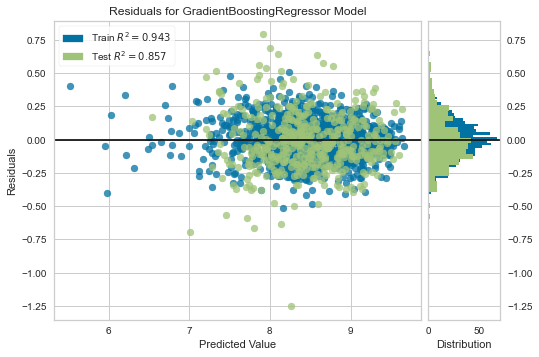

In [81]:
plot_model(gbrr)

In [82]:
gbrr

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=5,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.3, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=290,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=456, subsample=0.25, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [83]:
evaluate_model(gbrr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

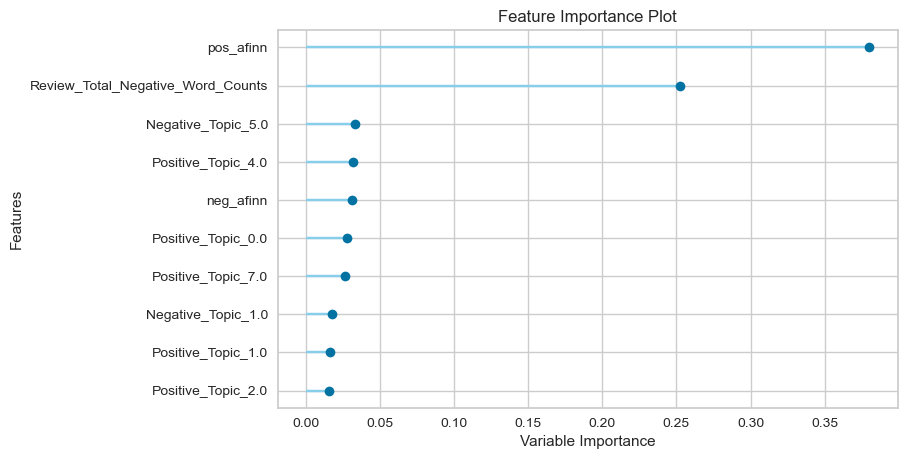

In [84]:
#Feature Importance plot
plot_model(gbrr, plot = 'feature')

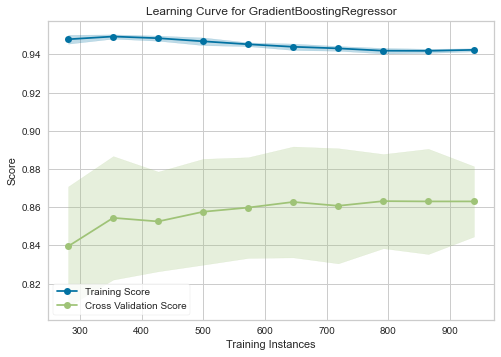

In [85]:
# Learning Curve
plot_model(gbrr, plot = 'learning')

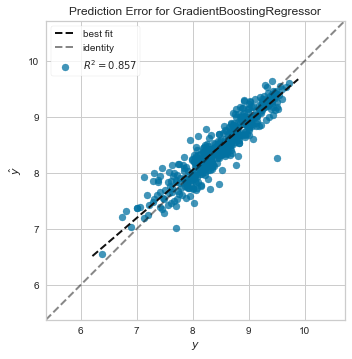

In [86]:
# Prediction Fit/Error
plot_model(gbrr, plot = 'error')

In [87]:
#Hyperparameters
plot_model(gbrr, plot = 'parameter')

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.05
loss,ls
max_depth,5
max_features,1.0
max_leaf_nodes,None
min_impurity_decrease,0.3


In [88]:
gbr_res = predict_model(gbrr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.1671,0.0493,0.2219,0.8572,0.0241,0.0201


In [89]:
gbr_res_summary = pull()

### Stacked Ensemble Model

In [92]:
stacked_models = stack_models(estimator_list = [lr, bridger, rfr, gbrr])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1665,0.0435,0.2086,0.8975,0.0231,0.0202
1,0.1439,0.0360,0.1898,0.9024,0.0206,0.0171
2,0.1573,0.0504,0.2245,0.8906,0.0245,0.0190
3,0.1529,0.0418,0.2045,0.8901,0.0230,0.0188
4,0.1792,0.0554,0.2353,0.8632,0.0251,0.0213
5,0.1855,0.0623,0.2497,0.8352,0.0268,0.0223
6,0.1750,0.0549,0.2343,0.8504,0.0246,0.0206
7,0.1670,0.0476,0.2182,0.8738,0.0237,0.0203
8,0.1365,0.0283,0.1681,0.9307,0.0182,0.0165
9,0.1711,0.0505,0.2247,0.8879,0.0251,0.0209


In [93]:
smr = tune_model(stacked_models, n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1665,0.0435,0.2086,0.8975,0.0231,0.0202
1,0.1439,0.0360,0.1898,0.9024,0.0206,0.0171
2,0.1573,0.0504,0.2245,0.8906,0.0245,0.0190
3,0.1529,0.0418,0.2045,0.8901,0.0230,0.0188
4,0.1792,0.0554,0.2353,0.8632,0.0251,0.0213
5,0.1855,0.0623,0.2497,0.8352,0.0268,0.0223
6,0.1750,0.0549,0.2343,0.8504,0.0246,0.0206
7,0.1670,0.0476,0.2182,0.8738,0.0237,0.0203
8,0.1365,0.0283,0.1681,0.9307,0.0182,0.0165
9,0.1711,0.0505,0.2247,0.8879,0.0251,0.0209


In [94]:
stacked_tuned = pull()
stacked_result =stacked_tuned.iloc[[10]].rename(index={'Mean':'Stacked Models'})
stacked_result

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Stacked Models,0.1635,0.0471,0.2158,0.8822,0.0235,0.0197


In [95]:
evaluate_model(smr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

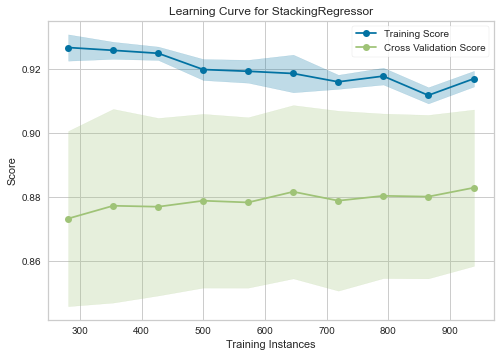

In [96]:
# Learning Curve
plot_model(smr, plot = 'learning')

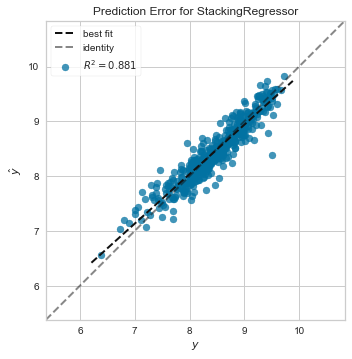

In [97]:
# Prediction Fit/Error
plot_model(smr, plot = 'error')

In [98]:
#Hyperparameters
plot_model(smr, plot = 'parameter')

,Parameters
cv,"KFold(n_splits=10, random_state=RandomState(MT..."
estimators,"[('lr', LinearRegression(copy_X=True, fit_inte..."
final_estimator,"LinearRegression(copy_X=True, fit_intercept=Tr..."
n_jobs,4
passthrough,True
verbose,0


In [99]:
smr

StackingRegressor(cv=KFold(n_splits=10, random_state=RandomState(MT19937) at 0x1D6053E8240,
   shuffle=False),
                  estimators=[('lr',
                               LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=4, normalize=False)),
                              ('br',
                               BayesianRidge(alpha_1=0.001, alpha_2=1e-06,
                                             alpha_init=None,
                                             compute_score=False, copy_X=True,
                                             fit_intercept=True, lambda_1=0.005,
                                             lambda_2=0.3, lambda_init...
                                                         min_samples_leaf=3,
                                                         min_samples_split=7,
                                                         min_weight_fraction_leaf=0.0,
                                            

In [100]:
stacked_res = predict_model(smr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.1518,0.0409,0.2022,0.8815,0.0218,0.0182


In [101]:
stacked_res_summary = pull()

### Model Performance Summary

### In-Sample performance

In [102]:
pd.concat([lr_result, ridge_result,bridge_result, dt_result, rf_result, gbr_result, stacked_result])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Linear Regression,0.1736,0.0526,0.2283,0.8686,0.0248,0.0209
Ridge Regression,0.1853,0.0598,0.2433,0.8513,0.0266,0.0224
Bayesian Ridge Regression,0.1723,0.0522,0.2273,0.8696,0.0247,0.0207
Decision Tree,0.2424,0.1016,0.3174,0.7468,0.0347,0.0294
Random Forest,0.1942,0.0661,0.2562,0.8351,0.0282,0.0236
Gradient Boost Regression,0.1772,0.0564,0.2366,0.8593,0.0259,0.0214
Stacked Models,0.1635,0.0471,0.2158,0.8822,0.0235,0.0197


### Out-of-sample Performance

In [103]:
pd.concat([lr_res_summary, dt_res_summary, ridge_res_summary,bridge_res_summary, rf_res_summary, gbr_res_summary, stacked_res_summary])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.1601,0.0433,0.2082,0.8744,0.0223,0.0191
0,Decision Tree Regressor,0.2499,0.1158,0.3403,0.6643,0.0374,0.0302
0,Ridge Regression,0.1762,0.0529,0.2299,0.8468,0.0248,0.0211
0,Bayesian Ridge,0.1589,0.0429,0.2072,0.8756,0.0222,0.0190
0,Random Forest Regressor,0.1797,0.0584,0.2417,0.8306,0.0262,0.0216
0,Gradient Boosting Regressor,0.1671,0.0493,0.2219,0.8572,0.0241,0.0201
0,Stacking Regressor,0.1518,0.0409,0.2022,0.8815,0.0218,0.0182
